In [44]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
from sklearn.datasets._samples_generator import make_blobs
X,Y = make_blobs(n_samples=40,centers=2, cluster_std=1.2,n_features=2,random_state=42)

In [46]:
#convert to -1 s and 1 s
for i,j in enumerate(Y):
    if j==0:
        Y[i]=-1
    elif j == 1 :
        Y[i] = 1

In [47]:
#group for plot
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
names = {-1:'Group 1',1:'Group 2'}
colors = {-1:(0,100/255,0,0.9), 1:(138/255,43/255,226/255,0.9)}
grouped = df.groupby('label')

In [48]:
#example lines
ex_line_x1 = np.linspace(-4,6,100)
ex_line_y1 = 1*ex_line_x1+4
ex_line_x2 = np.linspace(-4,6,100)
ex_line_y2 = 0.2*ex_line_x2+4.5
ex_line_x3 = np.linspace(-4,6,100)
ex_line_y3 = -0.1*ex_line_x3+5.5


<function matplotlib.pyplot.show(close=None, block=None)>

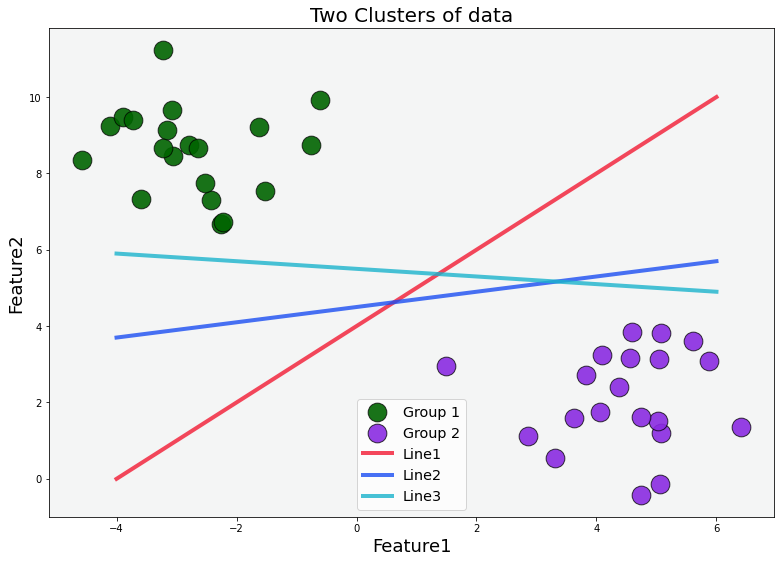

In [52]:
#plot setting and labels
fig = plt.figure(figsize=(13,9))
ax= fig.add_subplot(1,1,1)
ax.set_title("Two Clusters of data",fontsize=20)
ax.set_xlabel("Feature1",fontsize=  18)
ax.set_ylabel("Feature2",fontsize=  18)
ax.set_facecolor((244/255,245/255,245/255))

#plot the data and example
for key, group in grouped:
    ax.scatter(group.x,group.y, label=names[key],color=colors[key],edgecolor=(0,0,0,0.75),s=350)
ax.plot(ex_line_x1,ex_line_y1,color =(0.95,0.1,0.2,0.8), label = 'Line1',linewidth=4)
ax.plot(ex_line_x2,ex_line_y2,color =(0.1,0.3,0.95,0.8), label = 'Line2',linewidth=4)
ax.plot(ex_line_x3,ex_line_y3,color =(0.1,0.7,0.8,0.8), label = 'Line3',linewidth=4)
ax.legend(markerscale = 1,fontsize = 'x-large')
plt.show




In [38]:
#prepare dataset
#test sets
x_test = X[20:]
x_test = np.c_[x_test,np.ones(len(x_test))]
y_test = Y[20:]

#training sets
x = X[:20]
y = Y[:20]

#group for plotting
df_train = pd.DataFrame(dict(x=x[:,0], y=x[:,1] ,label = y))
grouped_train = df_train.groupby('label')

# add bias
x=np.c_[x,np.ones(len(x))]

# intitalize
w = np.zeros(len(x[0]))


In [42]:
#learning Rate
lam = 0.001
#array of numbers for shufflinf
order = np.arange(0,len(x),1)
margin_current=0
margin_previous = -10
pos_support_vectors = 0
neg_support_vectors = 0

not_converged = True 
t = 0 
start_time = time.time()

In [54]:
while(not_converged):
    margin_previous = margin_current
    t += 1
    pos_support_vectors = 0
    neg_support_vectors = 0

    eta = 1/(lam*t)
    fac = (1-(eta*lam))*w
    random.shuffle(order)
    for i in order:
        prediction = np.dot(x[i],w)
        
        #check for support vectors
        if(round((prediction),1) == 1 ) :
            pos_support_vectors += 1
        if(round((prediction),1) == -1 ) :
            neg_support_vectors +=1

        if(y[i]*prediction)<1:
            w = fac + eta*y[i]*x[i]

        else:
            w = fac
    if(t>10000):
        margin_current = np.linalg.norm(w)
        if((pos_support_vectors > 0 ) and (neg_support_vectors>0) and ((margin_current- margin_previous) <0.01)):
            not_converged = False


print("----%s seconds-----"% (time.time() - start_time))

----641.5769622325897 seconds-----


In [58]:
#create grid
grid_res = 200
xline = np.linspace(min(x[:,0]-(0.5*np.std(x[:,0]))),max(x[:,0]+(0.5*np.std(X[:,0]))),grid_res)
yline = np.linspace(min(x[:,1]-(0.5*np.std(x[:,1]))),max(x[:,0]+(0.5*np.std(X[:,0]))),grid_res)
grid = []
gridy = []
for i in range(grid_res):
    for j in range(grid_res):
        grid.append([xline[i],yline[j]])
        if(np.dot(w,[xline[i],yline[j],1]))>1:
            gridy.append((138/255,43/255,226255,0.1))
            #gridy.append('lightsteelblue')
        elif(np.dot(w,[xline[i],yline[j],1]))<-1:
            gridy.append((0,100/255,0,0.01))
            #grud append
        elif(round((np.dot(w,[xline[i],yline[j],1])),2)==0):
            grid.append((0,0,0,1))
        else:
            gridy.append((245/255,245/255,245/255))

grid = np.asarray(grid)
gridy = np.asarray(gridy)

C:\Users\factl\AppData\Local\Temp\ipykernel_23320\921829518.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  grid = np.asarray(grid)
C:\Users\factl\AppData\Local\Temp\ipykernel_23320\921829518.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gridy = np.asarray(gridy)


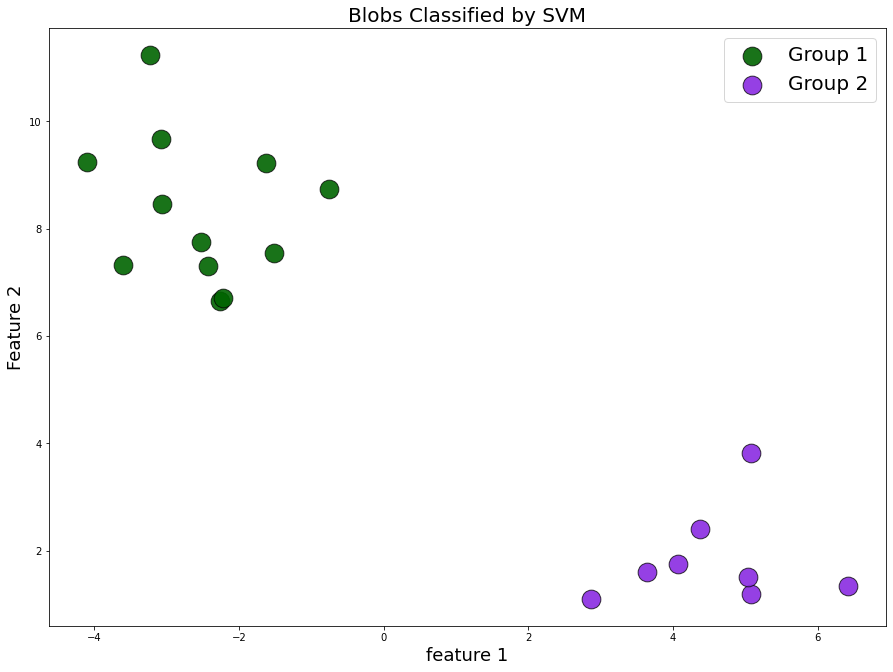

In [71]:
# plot the data
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(1,1,1)
ax.set_title("Blobs Classified by SVM", fontsize=20)
ax.set_xlabel("feature 1", fontsize=18)
ax.set_ylabel("Feature 2", fontsize=18)

for key, group in grouped_train:
    ax.scatter(group.x,group.y, label=names[key], color=colors[key],edgecolors=(0,0,0,0.75),s=350)
ax.legend(markerscale=1,fontsize=20,fancybox=True)
plt.show()

In [69]:
#test classifier

df_test = pd.DataFrame(dict(x=x_test[:,0], y=x_test[:,0], pred=y_pred_labels, label=y_test))
grouped_test = df_test.groupby('label')
grouped_pred = df_test.groupby('pred')
pred_colors = {1:'lime', 0:'red'}
pred_names = {1:'correct', 0:'incorrect'}

In [77]:
y_pred = ([])
for i in x_test:
  pred = np.dot(w,i)
  if(pred > 0):
    {y_pred.append(1)}
  elif(pred < 0):
    y_pred.append(-1)
y_pred_labels = ([])
for i, val in enumerate(y_pred):
  if(y_test[i] == y_pred[i]):
    y_pred_labels.append(1)
  else:
    y_pred_labels.append(0) 

   

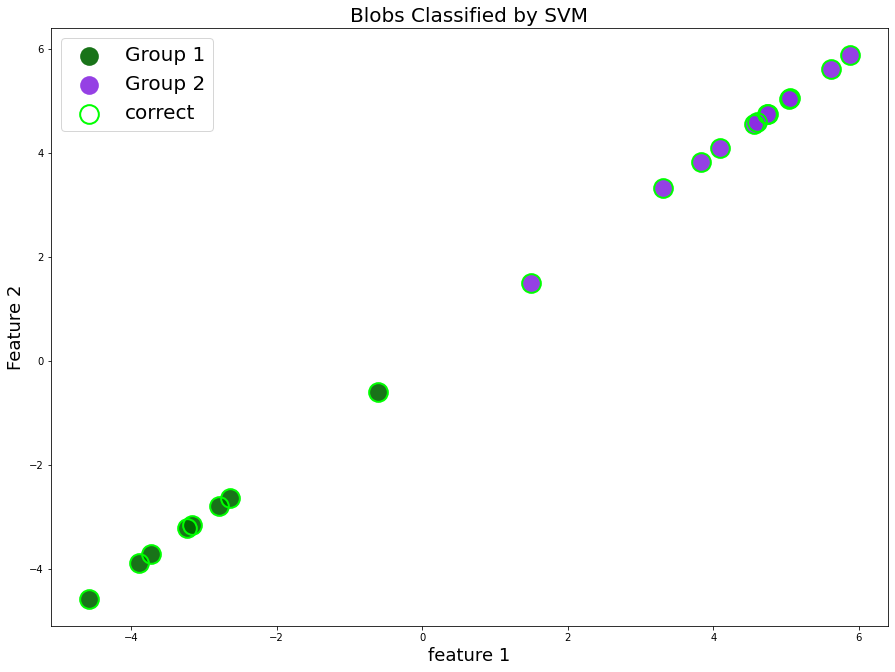

In [80]:
df_test = pd.DataFrame(dict(x=x_test[:,0], y=x_test[:,0], pred=y_pred_labels, label=y_test))
grouped_test = df_test.groupby('label')
grouped_pred = df_test.groupby('pred')
pred_colors = {1:'lime', 0:'red'}
pred_names = {1:'correct', 0:'incorrect'}


# plot the data
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(1,1,1)
ax.set_title("Blobs Classified by SVM", fontsize=20)
ax.set_xlabel("feature 1", fontsize=18)
ax.set_ylabel("Feature 2", fontsize=18)

for key, group in grouped_test:
    ax.scatter(group.x,group.y, label=names[key], color=colors[key],edgecolors=(0,0,0,0),s=350)
for key, group in grouped_pred:
    ax.scatter(group.x,group.y, label=pred_names[key], color=(0,0,0,0),linewidth=2,edgecolor=pred_colors[key],s=350)

ax.legend(markerscale=1,fontsize=20,fancybox=True)
plt.show()



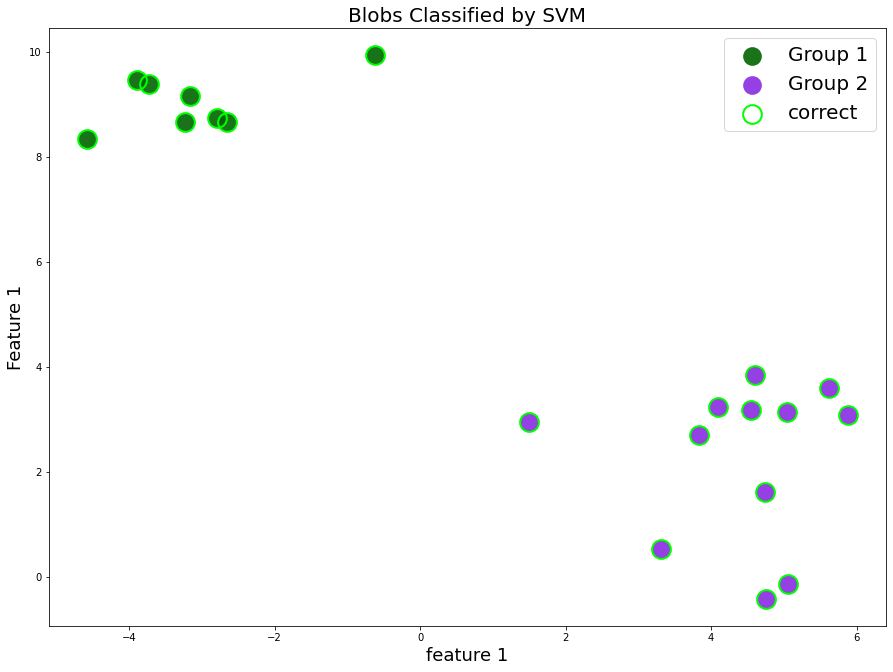

In [79]:
 # test classifier on test set
y_pred = ([])
for i in x_test:
    pred = np.dot(w,i)
    if(pred > 0):
        {y_pred.append(1)}
    elif(pred < 0):
        y_pred.append(-1)

y_pred_labels = ([])
for i,val in enumerate(y_pred):
    if(y_test[i] == y_pred[i]):
        y_pred_labels.append(1)
    else:
        y_pred_labels.append(0)




# group for plotting
df_test = pd.DataFrame(dict(x=x_test[:,0], y=x_test[:,1], pred=y_pred_labels,label=y_test))
grouped_test = df_test.groupby('label')
grouped_pred = df_test.groupby('pred')
pred_colors = {1:'lime', 0:'red'}
pred_names = {1:'correct', 0:'incorrect'}

# plot decision grid with prediction values
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(1,1,1)
ax.set_title("Blobs Classified by SVM", fontsize=20)
ax.set_xlabel("feature 1", fontsize=18)
ax.set_ylabel("Feature 1", fontsize=18)
for key, group in grouped_test:
    ax.scatter(group.x,group.y, label=names[key], color=colors[key],edgecolors=(0,0,0,0),s=350)
for key, group in  grouped_pred:
    ax.scatter(group.x,group.y, label=pred_names[key], color=(0,0,0,0),linewidths=2,edgecolors=pred_colors[key],s=350)
ax.legend(markerscale=1,fontsize=20,fancybox=True)
plt.show()